In [36]:
import pandas as pd

In [37]:
data=pd.read_csv('Loan_Data.csv')

In [38]:
var1=data['ApplicantIncome']
type(var1)

pandas.core.series.Series

In [39]:
var1.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [5]:
l=len(var1)

In [6]:
l

614

In [7]:
avg=var1.mean()

In [8]:
avg

5403.459283387622

In [9]:
st=var1.std()

In [10]:
st

6109.041673387174

In [11]:
va=var1.var()

In [12]:
va

37320390.167181164

In [13]:
var1.min()

150

In [14]:
var1.max()

81000

In [15]:
var1.quantile(0.25)

2877.5

In [16]:
var1.quantile([0.10,0.25,0.5,0.75,0.99])

0.10     2216.10
0.25     2877.50
0.50     3812.50
0.75     5795.00
0.99    32540.41
Name: ApplicantIncome, dtype: float64

In [17]:
var1.skew()

6.539513113994625

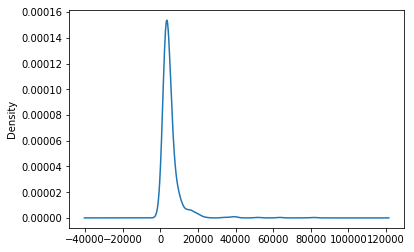

In [18]:
%matplotlib inline
var1.plot(kind='kde')

In [19]:
import numpy as np

In [20]:
var1_log=np.log(var1)

In [21]:
var1_log.skew()

0.4795799780016222

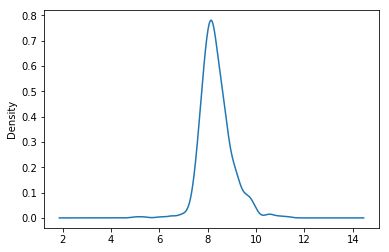

In [22]:
var1_log.plot(kind='kde')

In [23]:
var1_log.describe()

count    614.000000
mean       8.341213
std        0.645263
min        5.010635
25%        7.964677
50%        8.246040
75%        8.664750
max       11.302204
Name: ApplicantIncome, dtype: float64

In [24]:
var1_sqrt=np.sqrt(var1)

In [25]:
var1_sqrt.describe()

count    614.000000
mean      68.497955
std       26.695508
min       12.247449
25%       53.642329
50%       61.745445
75%       76.124876
max      284.604989
Name: ApplicantIncome, dtype: float64

In [26]:
var1_sqrt.skew()

2.9672860248621027

In [27]:
import seaborn as sb

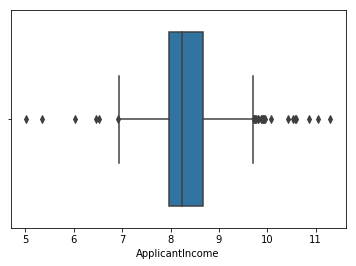

In [28]:
sb.boxplot(var1_log)

In [29]:
#Bivariate analysis
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [30]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


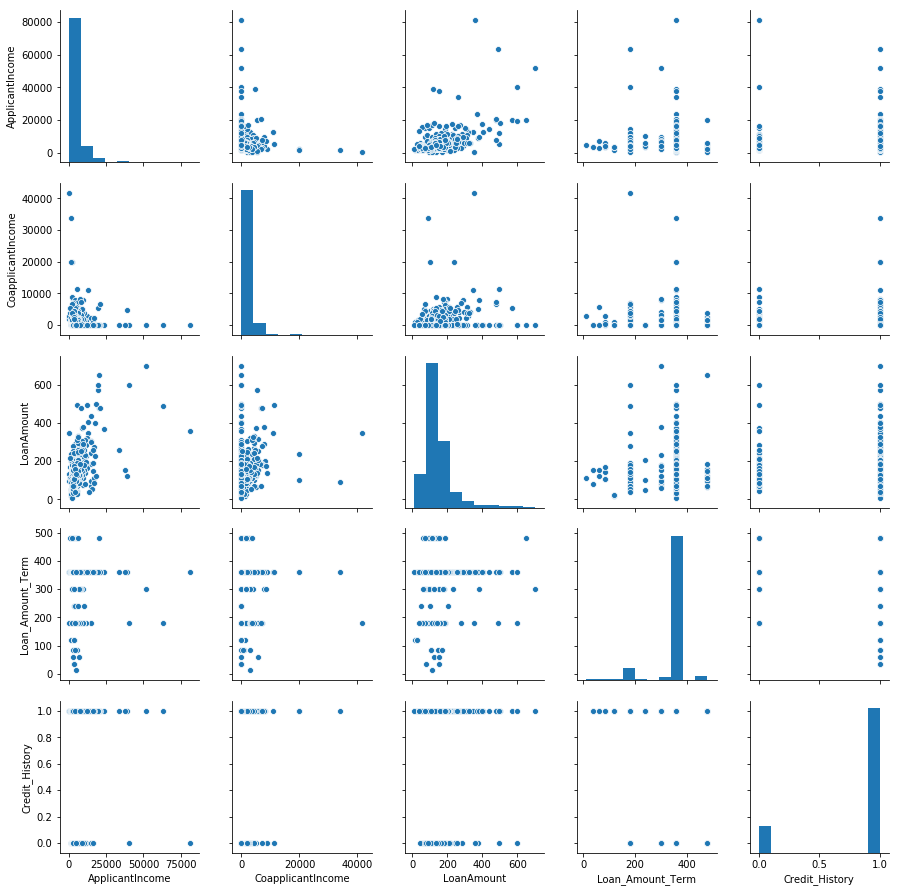

In [31]:
sb.pairplot(data)

In [32]:
data.corr(method='spearman')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.043241
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.007458
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.002361
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.015088
Credit_History,0.043241,-0.007458,-0.002361,0.015088,1.000000


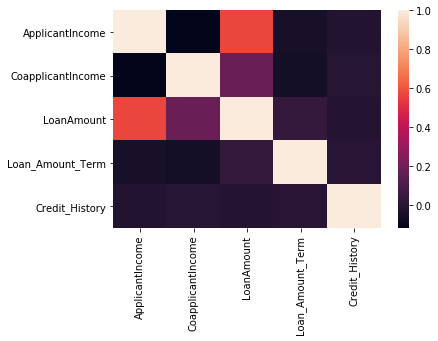

In [33]:
sb.heatmap(data.corr())

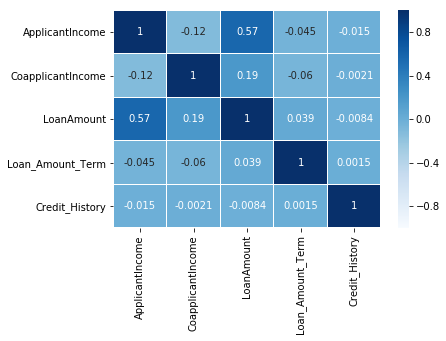

In [34]:
sb.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='Blues',linewidths=0.2)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


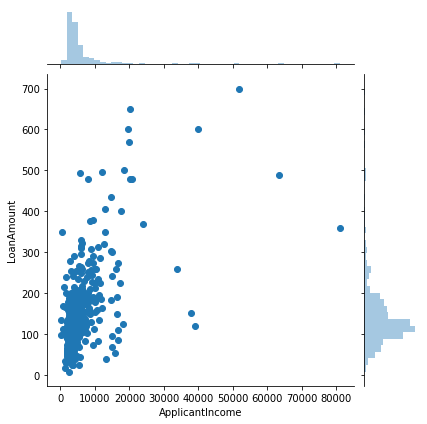

In [35]:
sb.jointplot(data['ApplicantIncome'],data['LoanAmount'])

In [62]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [66]:
tab=pd.crosstab(index = data['Gender'], columns = data['Education'])
tab

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113


In [70]:
import scipy.stats as stats
stats.chi2_contingency(tab)

(1.1694272366695504,
 0.2795189591992029,
 1,
 array([[ 87.21464226,  24.78535774],
        [380.78535774, 108.21464226]]))

In [73]:
tab1=pd.crosstab(index = data['ApplicantIncome'], columns = data['Property_Area'])

In [74]:
tab1.head(2)

Property_Area,Rural,Semiurban,Urban
ApplicantIncome,,,
150,1,0,0
210,0,1,0


In [75]:
stats.chi2_contingency(tab1)

(1027.2103282926419,
 0.3299739859729519,
 1008,
 array([[0.29153094, 0.37947883, 0.32899023],
        [0.29153094, 0.37947883, 0.32899023],
        [0.29153094, 0.37947883, 0.32899023],
        ...,
        [0.29153094, 0.37947883, 0.32899023],
        [0.29153094, 0.37947883, 0.32899023],
        [0.29153094, 0.37947883, 0.32899023]]))

#One Category One Numeric - one way annova
#Two+ Category One Numeric - two way annova
#One Category + One Numeric - One Numeric - Annocova

In [77]:
F, p = stats.f_oneway(data[data['Property_Area']=='Urban']['ApplicantIncome'],
                     data[data['Property_Area']=='Rural']['ApplicantIncome'],
                     data[data['Property_Area']=='Semiurban']['ApplicantIncome'])

In [78]:
p

0.9113839401724976

In [79]:
F

0.09280511472442918

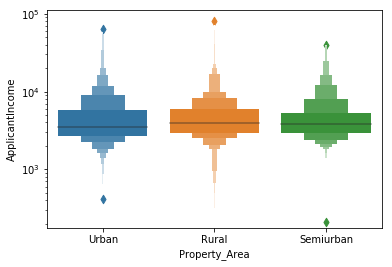

In [82]:
sb.boxenplot(data['Property_Area'],data['ApplicantIncome'])
plt.yscale('log')

In [83]:
import statsmodels.stats.multicomp as mc

In [86]:
mcobj = mc.MultiComparison(data['ApplicantIncome'],data['Property_Area'])

In [90]:
out2=mcobj.tukeyhsd(0.05)

In [88]:
print(out2)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
  group1    group2   meandiff   lower      upper   reject
---------------------------------------------------------
  Rural   Semiurban  -261.822  -1690.51   1166.866 False 
  Rural     Urban   -155.8363 -1631.385  1319.7124 False 
Semiurban   Urban    105.9857 -1275.9386  1487.91  False 
---------------------------------------------------------


In [91]:
data=pd.read_excel('stat.xlsx',sheetname='ttest-indep')

D:\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [92]:
stats.shapiro(data['Control'].dropna())

(0.9694256782531738, 0.3764776885509491)

In [93]:
stats.levene(data['Control'].dropna(),data['Treatment'].dropna())

LeveneResult(statistic=0.0019176395100468737, pvalue=0.9651859638039372)

In [94]:
t,p=stats.ttest_ind(data['Control'].dropna(),data['Treatment'].dropna())

In [95]:
p

0.0003975985316726024

In [96]:
t

-3.7059785260397513

#Missing Value Treatment